In [ ]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
from pandas import DataFrame as df
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import seaborn as sns


from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [ ]:
data = pd.read_csv("./diabetes.csv")

In [ ]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


In [ ]:
data.shape

(390, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


In [ ]:
data.describe()

,patient_number,cholesterol,glucose,hdl_chol,age,height,weight,systolic_bp,diastolic_bp,waist,hip
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,46.774359,65.951282,177.407692,137.133333,83.289744,37.869231,42.992308
std,112.727548,44.666005,53.798188,17.279069,16.435911,3.918867,40.407824,22.859528,13.498192,5.760947,5.664342
min,1.000000,78.000000,48.000000,12.000000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,98.250000,179.000000,81.000000,38.000000,34.000000,63.000000,150.250000,122.000000,75.000000,33.000000,39.000000
50%,195.500000,203.000000,90.000000,46.000000,44.500000,66.000000,173.000000,136.000000,82.000000,37.000000,42.000000
75%,292.750000,229.000000,107.750000,59.000000,60.000000,69.000000,200.000000,148.000000,90.000000,41.000000,46.000000
max,390.000000,443.000000,385.000000,120.000000,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


Ниже приведен нормальный диапазон различных растворенных веществ в крови:

1. Уровень холестерина - менее 200
2. Уровень глюкозы 80-120 (в норме)
3. Уровень холестерина ЛПВП более 60
4. Систолическое АД - 120
5. Диастолическое АД - 80

Ниже приведены моменты, вызывающие озабоченность в приведенном выше выводе кода:

*   Максимальный уровень холестерина, обнаруженный в данных, составляет 443, глюкозы 385, холестерина ЛПВП 120, систолического АД 250, диастолического 124
*   Минимальное значение хс лпвп - 12.
*   Вес 75% пациентов составляет от 99 до 200 г.

Общепризнано, что повышенный вес и пожилой возраст являются двумя основными факторами, вызывающими диабет.

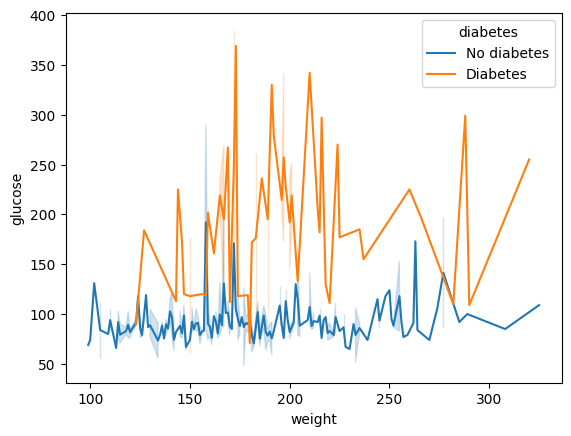

In [ ]:
sns.lineplot(y = 'glucose',x = 'weight', hue = 'diabetes', data = data)
plt.show()

Пациенты с сахарным диабетом имеют более высокий уровень глюкозы и больший вес по сравнению с недиабетическими пациентами

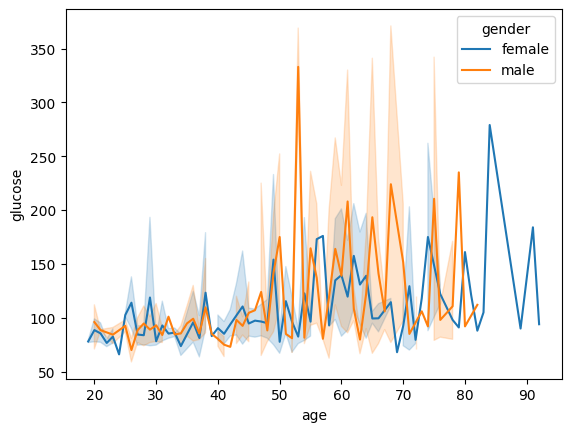

In [ ]:
sns.lineplot(y = 'glucose', x = 'age', hue = 'gender', data = data)
plt.show()

Возраст напрямую не определяется, но более высокий уровень глюкозы у пожилых людей может быть причиной развития у них диабета, также у мужчин в возрасте от 40 до 80 лет уровень глюкозы в крови выше, чем у женщин.

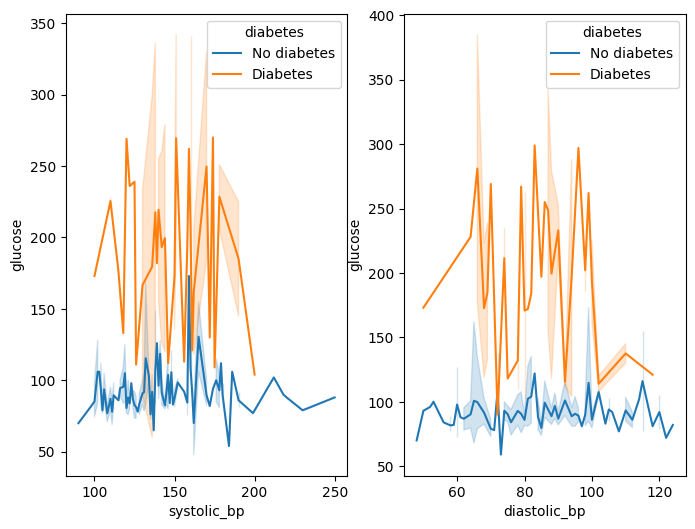

In [ ]:
figure, axis = plt.subplots(1, 2, figsize=(8, 6))
sns.lineplot(ax=axis[0], x='systolic_bp', y='glucose', hue='diabetes', data=data)
sns.lineplot(ax=axis[1], x='diastolic_bp', y='glucose', hue='diabetes', data=data)
plt.show()

АД напрямую не связано с сахарным диабетом, поскольку пациенты с самым высоким АД считаются недиабетическими.

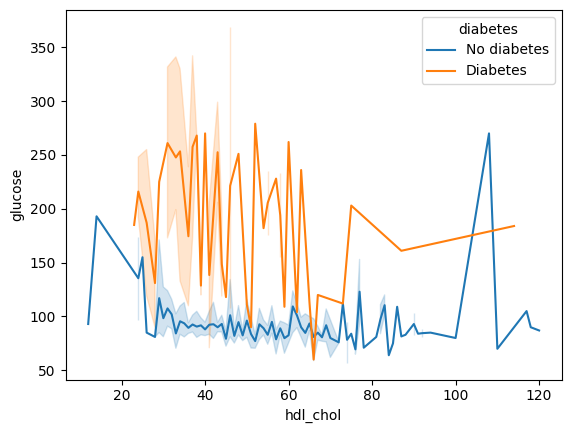

In [ ]:
sns.lineplot(x=data.hdl_chol, y=data.glucose, hue=data.diabetes, data=data)
plt.show()

Пациенты с сахарным диабетом имеют более низкий уровень холестерина ЛПВП

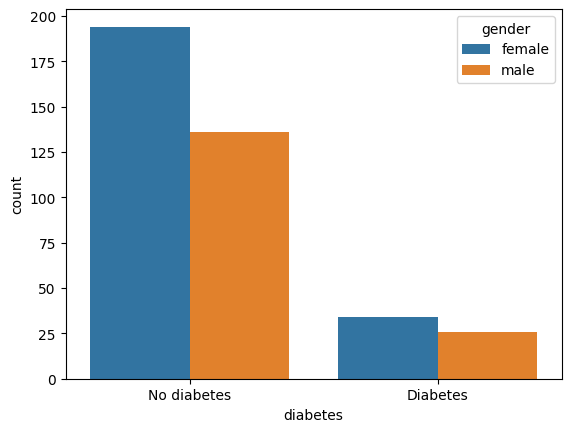

In [ ]:
sns.countplot(x='diabetes', hue='gender', data=data)
plt.show()

Женщин, страдающих сахарным диабетом, больше, чем мужчин, страдающих сахарным диабетом.

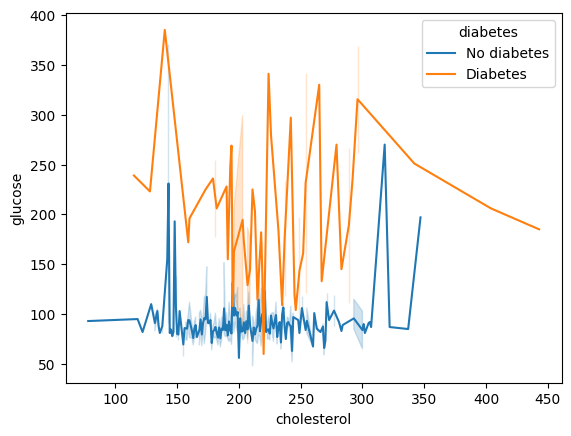

In [ ]:
sns.lineplot(x=data.cholesterol, y=data.glucose, hue=data.diabetes, data=data)
plt.show()

Более высокий уровень холестерина наблюдается у пациентов с сахарным диабетом

In [ ]:
data['diabetes'].value_counts()

No diabetes    330
Diabetes        60
Name: diabetes, dtype: int64

In [ ]:
data['chol_hdl_ratio'] = pd.Series(data['chol_hdl_ratio']).str.replace(',','.')
data['bmi'] = pd.Series(data['bmi']).str.replace(',','.')
data['waist_hip_ratio'] = pd.Series(data['waist_hip_ratio']).str.replace(',','.')

In [ ]:
data = data.replace(['male', 'female'], [1.0, 0.0])
data = data.replace(['Diabetes', 'No diabetes'], [1.0, 0.0])

In [ ]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,0.0,61,119,22.5,118,70,32,38,0.84,0.0
1,2,146,79,41,3.6,19,0.0,60,135,26.4,108,58,33,40,0.83,0.0
2,3,217,75,54,4,20,0.0,67,187,29.3,110,72,40,45,0.89,0.0
3,4,226,97,70,3.2,20,0.0,64,114,19.6,122,64,31,39,0.79,0.0
4,5,164,91,67,2.4,20,0.0,70,141,20.2,122,86,32,39,0.82,0.0


In [ ]:
data.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [ ]:
null_values=['cholesterol','glucose','hdl_chol','chol_hdl_ratio','bmi','systolic_bp','diastolic_bp', 'waist', 'hip', 'waist_hip_ratio']

In [ ]:
for i in null_values :
    x = data[i].median()
    data[i].fillna(x, inplace = True)

In [ ]:
data.isnull().sum()

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [ ]:
data.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,0.0,61,119,22.5,118,70,32,38,0.84,0.0
1,2,146,79,41,3.6,19,0.0,60,135,26.4,108,58,33,40,0.83,0.0
2,3,217,75,54,4,20,0.0,67,187,29.3,110,72,40,45,0.89,0.0
3,4,226,97,70,3.2,20,0.0,64,114,19.6,122,64,31,39,0.79,0.0
4,5,164,91,67,2.4,20,0.0,70,141,20.2,122,86,32,39,0.82,0.0


In [ ]:
res = pd.DataFrame(data)
res.to_csv("res.txt",sep = ',')

In [ ]:
res_male = 0
res_female = 0

In [ ]:
for elem in res.values:
  if elem[-1] == 1:
    if elem[0] == 1:
      res_male+=1
    else:
      res_female +=1
print(res_male,res_female)

0 60


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,shuffle=True,random_state= True)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
print("Train Score: :" ,model.score(x_train,y_train))
print("Test Score : " ,model.score(x_test,y_test))

Train Score: : 0.9230769230769231
Test Score :  0.9102564102564102


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


In [ ]:
model2 = BernoulliNB(binarize=0.0)
model2.fit(x_train, y_train)
print("Test score = ",model2.score(x_test, y_test))
print("Train score = ", model2.score(x_train, y_train))

Test score =  0.9358974358974359
Train score =  0.8910256410256411


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error,r2_score


In [ ]:
params = {'n_estimators':200,
          'max_depth':12,
          'criterion':'friedman_mse',
          'learning_rate':0.03,
          'min_samples_leaf':16,
          'min_samples_split':16
          }
gbr = GradientBoostingRegressor(**params)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=12, min_samples_leaf=16,
                          min_samples_split=16, n_estimators=200)

In [ ]:
print("Score is" ,gbr.score(x_test,y_test))

Score is 0.45326532089537974


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))

1.0


In [ ]:
print(rfc.score(x_test,y_test))

0.9102564102564102


In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Feature Importance')

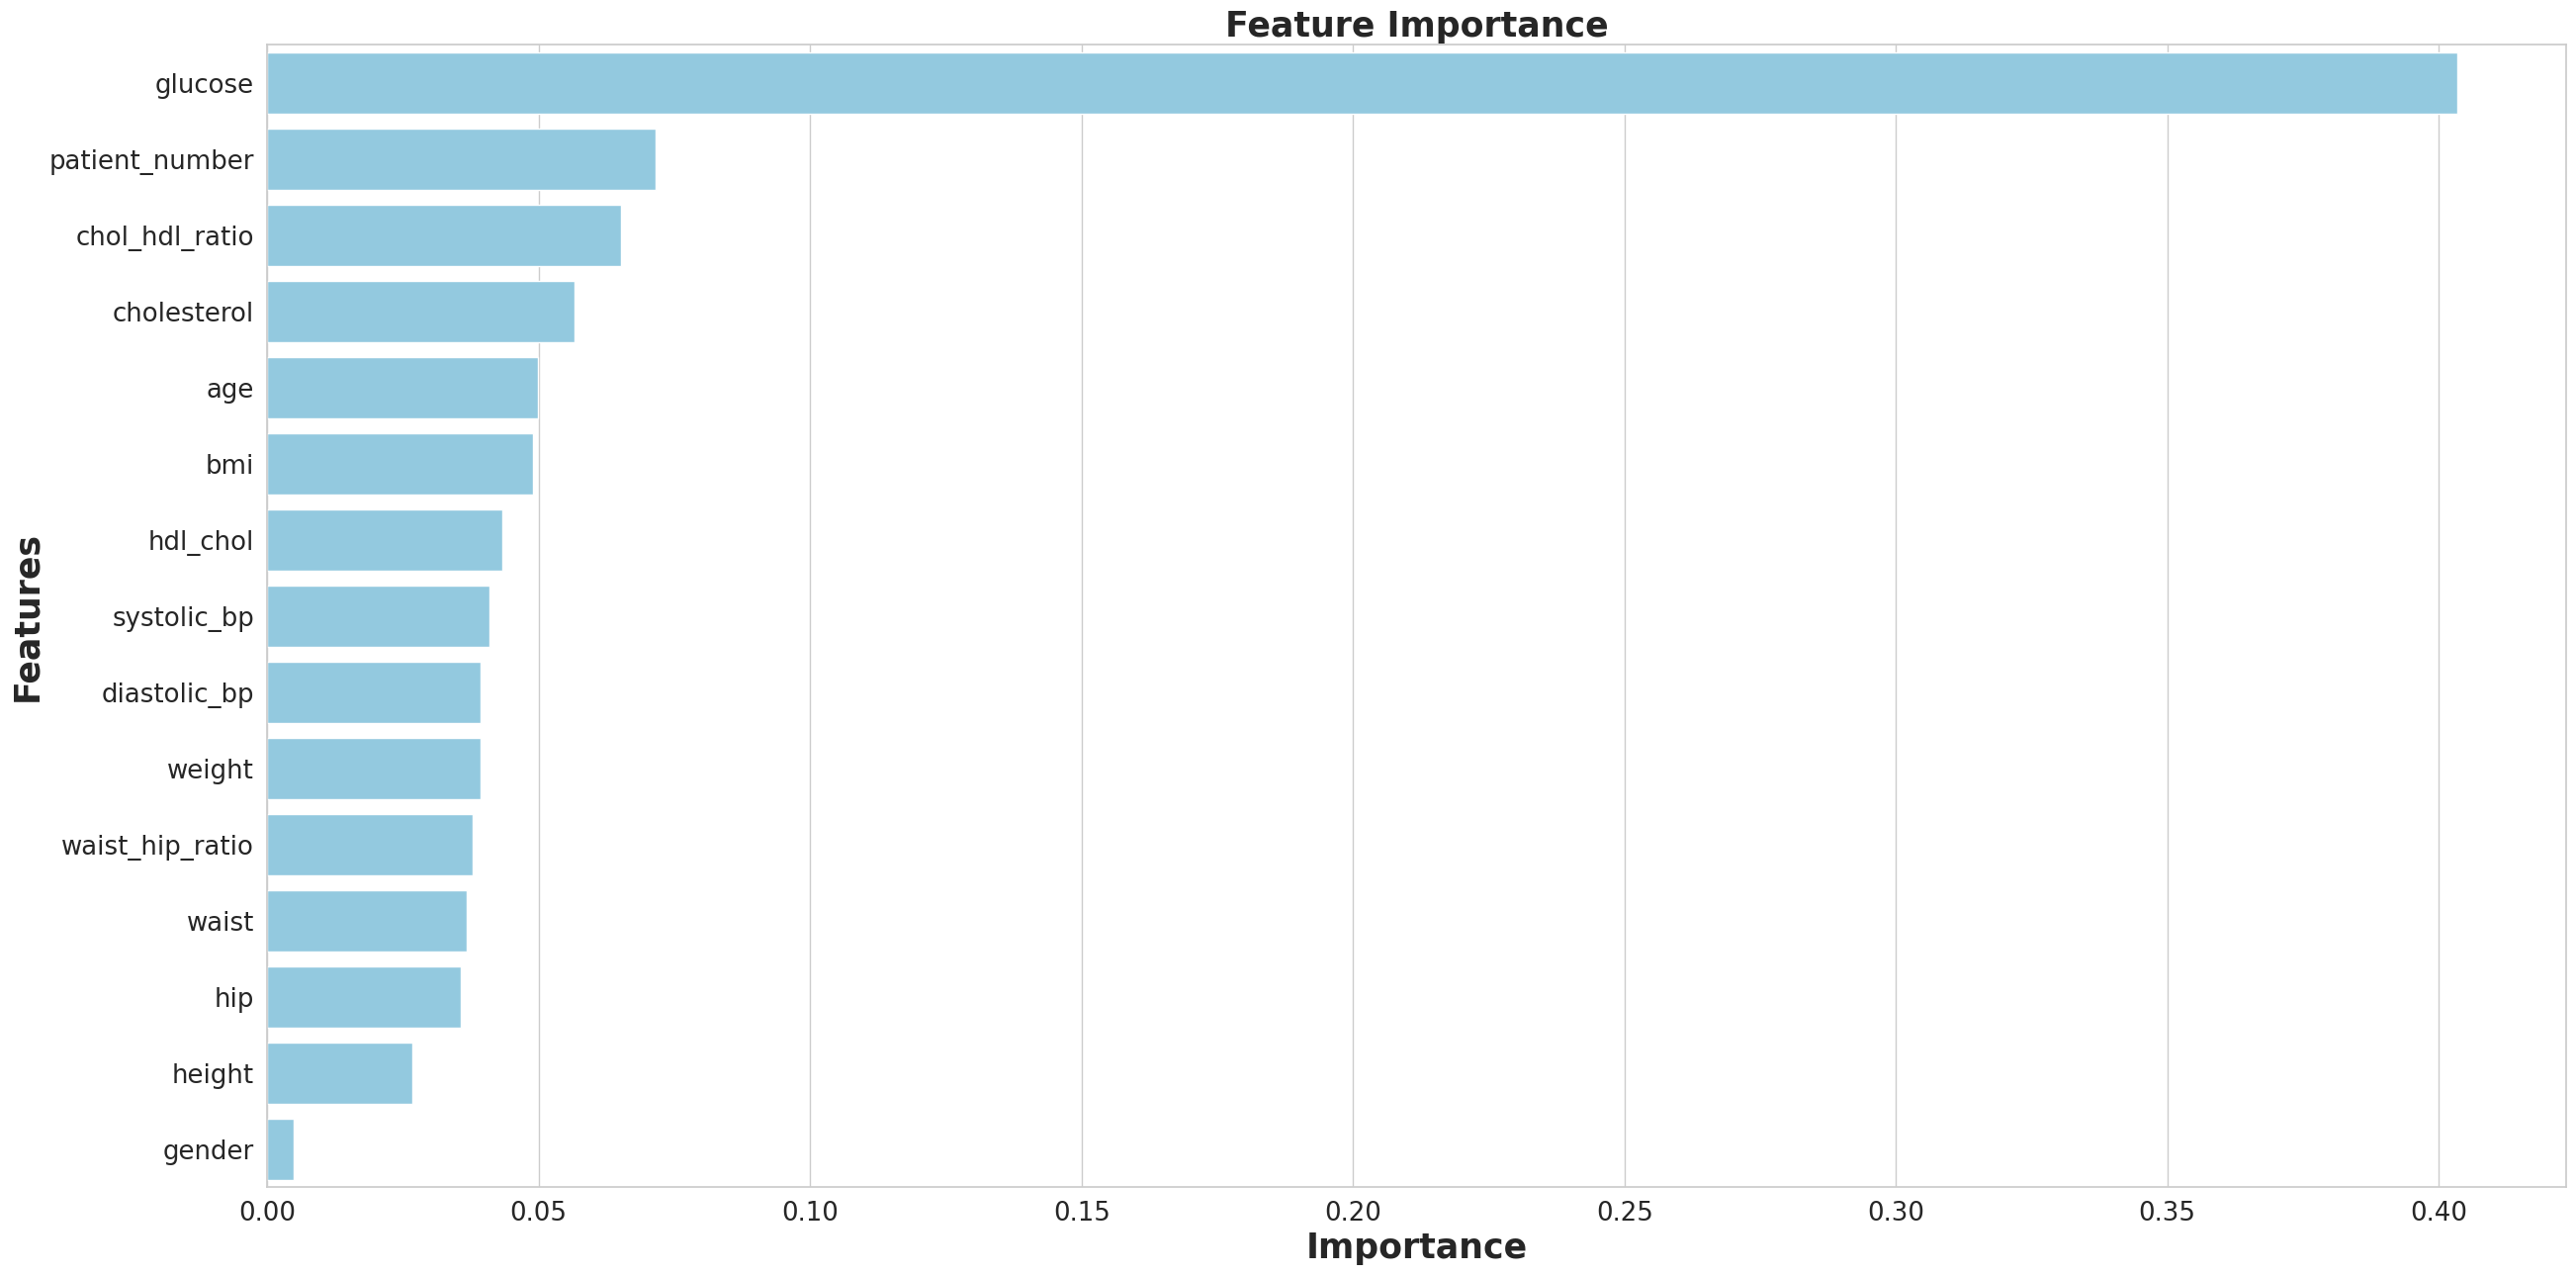

In [ ]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')

In [ ]:
pd.DataFrame(data = sorted(rfc.feature_importances_,reverse = True),index = [i  for i in data][:-1])

,0
patient_number,0.403334
cholesterol,0.071473
glucose,0.065079
hdl_chol,0.056658
chol_hdl_ratio,0.049930
age,0.048869
gender,0.043274
height,0.040941
weight,0.039320
bmi,0.039237


In [ ]:
from sklearn.decomposition import PCA

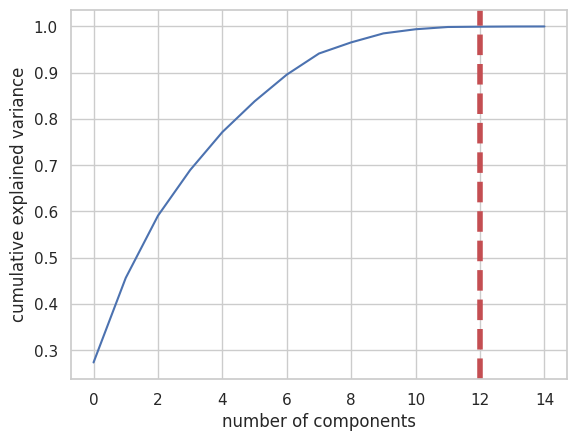

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.273570,0.273570
1,0.456426,0.182856
2,0.590818,0.134392
3,0.689581,0.098762
4,0.771676,0.082095
5,0.838106,0.066430
6,0.895833,0.057727
7,0.941506,0.045673
8,0.965579,0.024073


In [ ]:
pca_test = PCA(n_components=15)
pca_test.fit(x_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=12, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(9))

In [ ]:
pca = PCA(n_components=9)
pca.fit(x_train)
X_train_scaled_pca = pca.transform(x_train)
X_test_scaled_pca = pca.transform(x_test)


In [ ]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train_scaled_pca, y_train)
print(rfc2.score(X_train_scaled_pca, y_train),rfc2.score(X_test_scaled_pca,y_test))

1.0 0.8846153846153846


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(rfc2,
                        param_dist,
                        n_iter = 100,
                        cv = 3,
                        verbose = 1,
                        n_jobs=-1,
                        random_state=0)
rs.fit(X_train_scaled_pca, y_train)
rs.best_params_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 600,
 'min_samples_split': 50,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': False}

In [ ]:
rs_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
rs_df = rs_df.drop([
            'mean_fit_time',
            'std_fit_time',
            'mean_score_time',
            'std_score_time',
            'params',
            'split0_test_score',
            'split1_test_score',
            'split2_test_score',
            'std_test_score'],
            axis=1)
rs_df.head(10)

,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,mean_test_score,rank_test_score
0,600,50,2,sqrt,7,False,0.910256,1
1,700,12,2,sqrt,13,False,0.907051,2
2,700,2,2,log2,11,True,0.903846,3
3,200,12,2,log2,4,True,0.903846,3
4,700,18,7,sqrt,7,False,0.903846,3
5,700,23,7,log2,15,False,0.903846,3
6,600,23,2,sqrt,15,False,0.903846,3
7,400,23,2,sqrt,14,False,0.903846,3
8,1000,44,2,sqrt,9,True,0.900641,9
9,300,39,2,sqrt,3,True,0.897436,10


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
n_estimators = [600,700,200]
max_features = ['sqrt','log2']
max_depth = [7,13,4]
min_samples_split = [50,12,12]
min_samples_leaf = [2,2,2]
bootstrap = [False,False,True]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
gs = GridSearchCV(rfc2, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train_scaled_pca, y_train)
rfc_3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 486 candidates, totalling 1458 fits


{'bootstrap': False,
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 50,
 'n_estimators': 700}

# Корреляция

In [ ]:
data.corr()

<ipython-input-47-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,patient_number,cholesterol,glucose,hdl_chol,age,gender,height,weight,systolic_bp,diastolic_bp,waist,hip,diabetes
patient_number,1.000000,0.252092,0.307722,-0.000842,0.988888,0.090170,-0.063513,-0.042151,0.450950,0.084154,0.156468,0.012499,0.317830
cholesterol,0.252092,1.000000,0.158102,0.193162,0.247333,-0.030139,-0.063601,0.062359,0.207741,0.166241,0.134038,0.093364,0.204262
glucose,0.307722,0.158102,1.000000,-0.158302,0.294392,0.093372,0.098052,0.190358,0.162777,0.020262,0.222336,0.138223,0.689080
hdl_chol,-0.000842,0.193162,-0.158302,1.000000,0.028210,-0.108305,-0.087238,-0.291883,0.031807,0.078342,-0.276697,-0.223837,-0.123133
age,0.988888,0.247333,0.294392,0.028210,1.000000,0.084177,-0.082229,-0.056784,0.453417,0.068649,0.150585,0.004675,0.301995
gender,0.090170,-0.030139,0.093372,-0.108305,0.084177,1.000000,0.677876,0.092053,0.035417,0.071043,-0.045955,-0.272028,0.015531
height,-0.063513,-0.063601,0.098052,-0.087238,-0.082229,0.677876,1.000000,0.255389,-0.040704,0.043617,0.057447,-0.095906,0.023466
weight,-0.042151,0.062359,0.190358,-0.291883,-0.056784,0.092053,0.255389,1.000000,0.097497,0.166477,0.847766,0.826985,0.162987
systolic_bp,0.450950,0.207741,0.162777,0.031807,0.453417,0.035417,-0.040704,0.097497,1.000000,0.603662,0.210934,0.155321,0.198600
diastolic_bp,0.084154,0.166241,0.020262,0.078342,0.068649,0.071043,0.043617,0.166477,0.603662,1.000000,0.165846,0.143898,0.049351


<ipython-input-48-fa5238e530e5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(


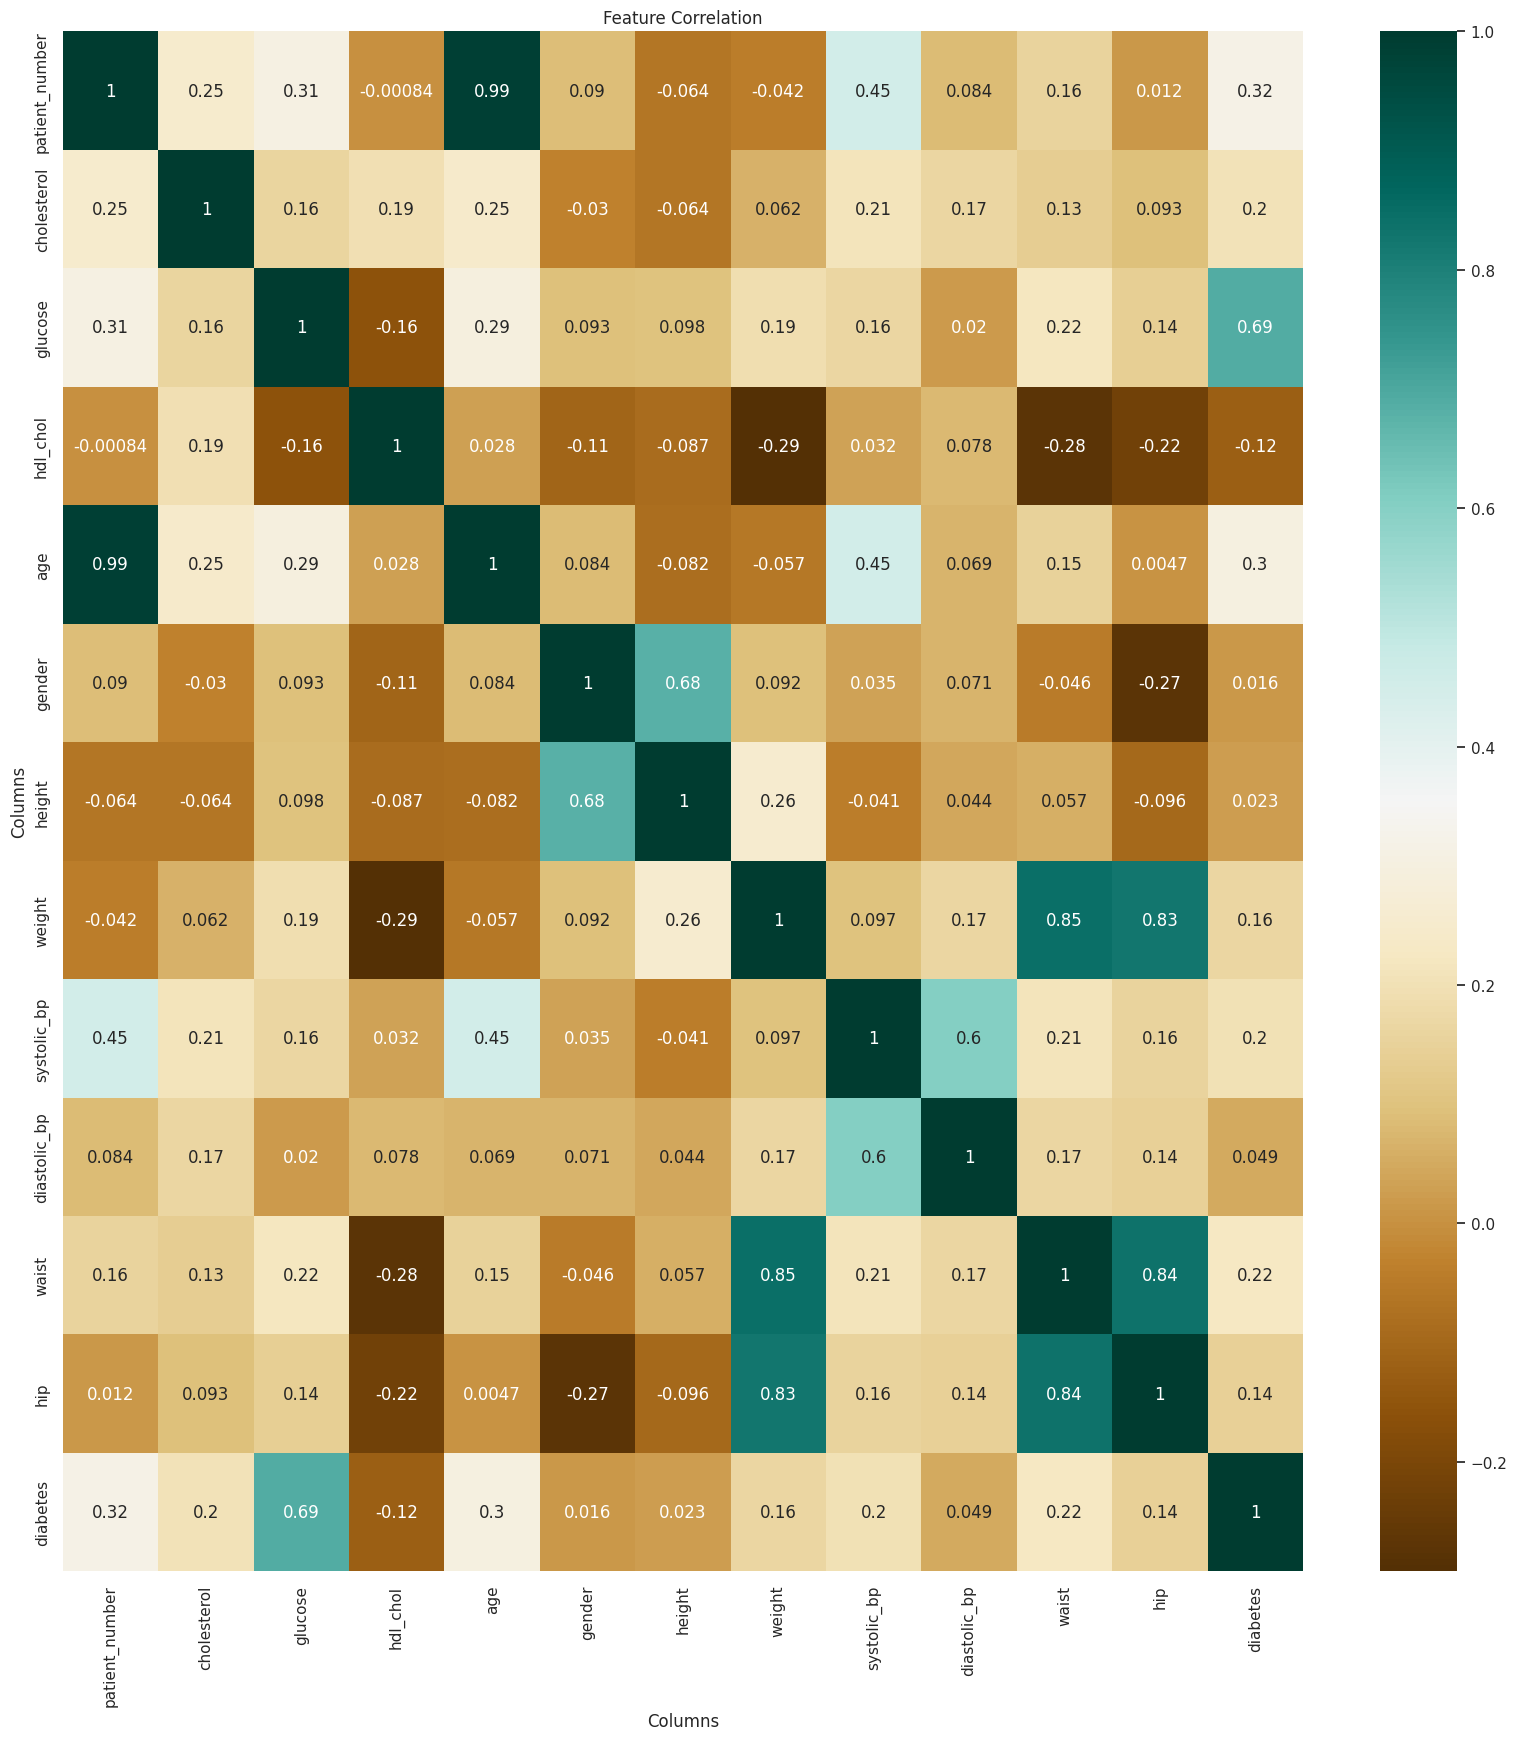

In [ ]:
data
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Как мы также видели на приведенных выше графиках, уровень глюкозы напрямую связан с причиной диабета. Хороший холестрол или ЛПВП-холестрол отрицательно связан, вес, возраст и холестрол также влияют, но в очень меньшей степени, у пациентов мужского пола уровень глюкозы выше, но из общего числа пациентов у женщин было больше случаев диабета, чем у мужчин, но разница была очень небольшой.

Особенности построения модели
1. холестерин
2. глюкоза
3. лпвп_холестерин
4. возраст
5. пол
6. вес
7. систолическое артериальное давление диастолическое артериальное
8. давление
9. диабет

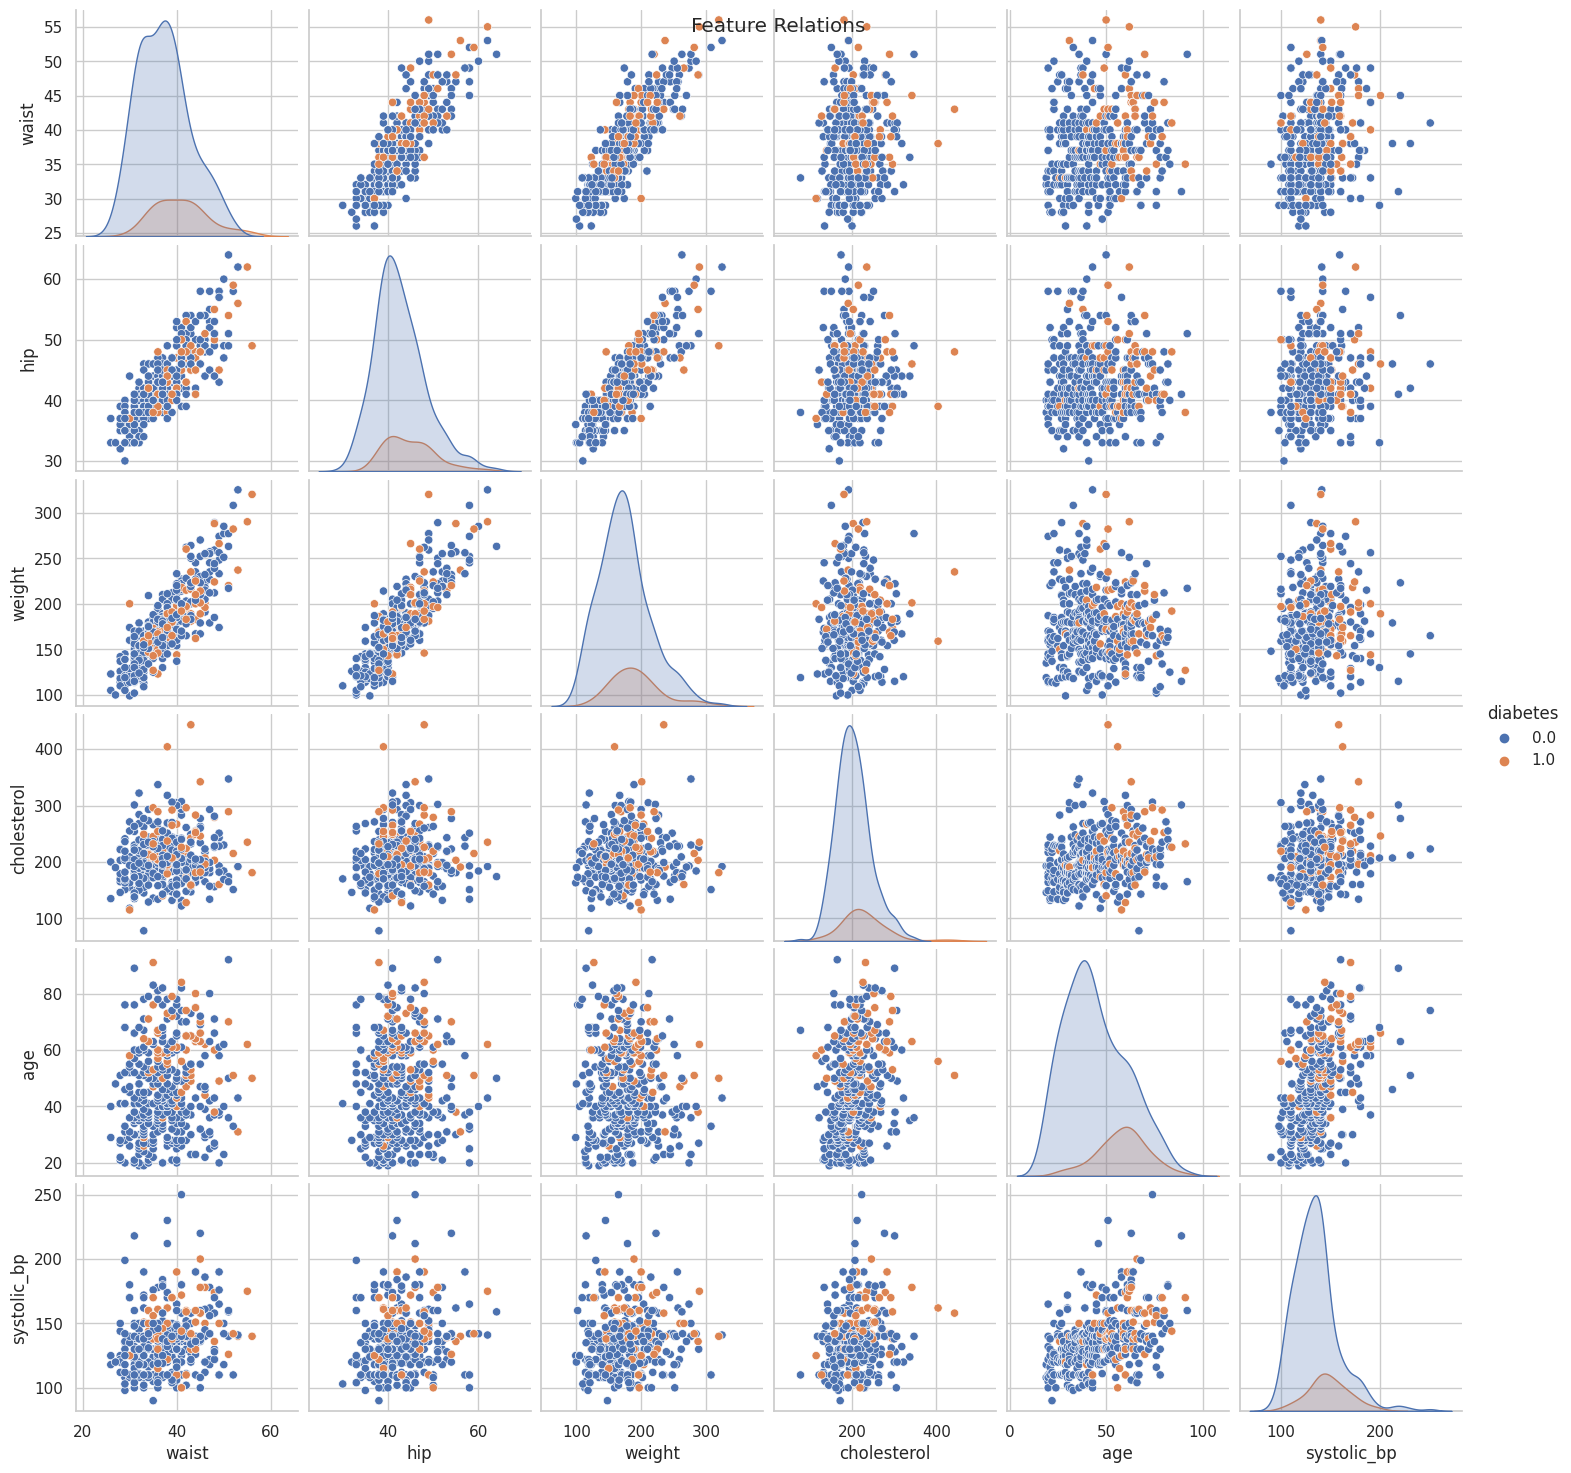

In [ ]:
figures = sns.pairplot(data[['waist','hip','weight','bmi','chol_hdl_ratio','cholesterol','age','systolic_bp','diabetes']], hue='diabetes')
figures.fig.suptitle('Feature Relations')
plt.show()

<Figure size 1200x1200 with 0 Axes>

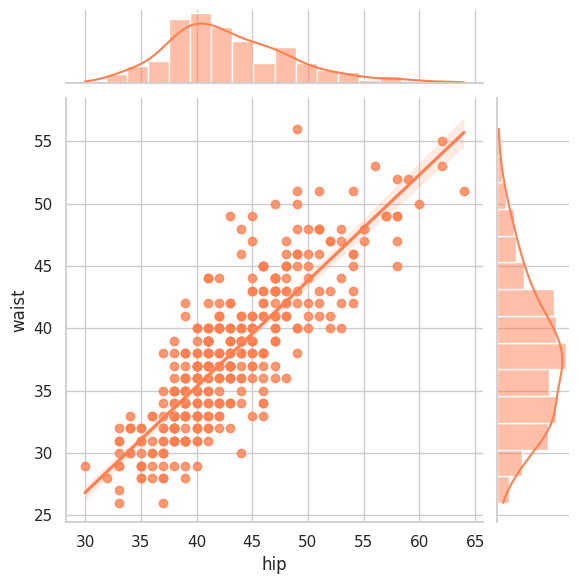

In [ ]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'hip', y= 'waist', kind= 'reg',color='coral')
plt.show()

In [ ]:
y=data.diabetes.values
X=data.drop(columns=["diabetes","patient_number"])
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=17,shuffle=True,stratify=y)

In [ ]:
lr = LogisticRegression(solver='liblinear', random_state=42)
lr.fit(train_X, train_y)
predictions = lr.predict(test_X)

In [ ]:
print("Accuracy Score :",accuracy_score(test_y,predictions))
print("Classification Report \n",classification_report(test_y,predictions))

Accuracy Score : 0.9230769230769231
Classification Report 
               precision    recall  f1-score   support

         0.0       0.94      0.97      0.96        66
         1.0       0.80      0.67      0.73        12

    accuracy                           0.92        78
   macro avg       0.87      0.82      0.84        78
weighted avg       0.92      0.92      0.92        78



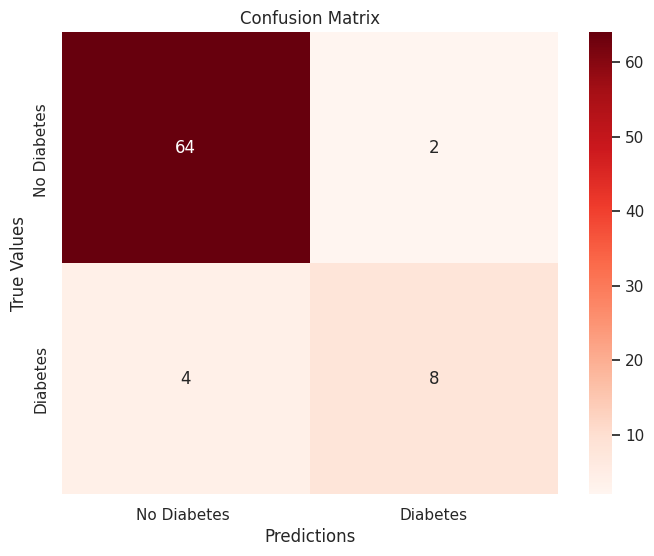

In [ ]:
cm = confusion_matrix(test_y,predictions)

class_names = ["No Diabetes ", "Diabetes"]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

# LOGISTIC REGRESSION

In [ ]:
target = ['0', '1']

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression(solver='liblinear')
log.fit(x_train, y_train)
log_pred = log.predict(x_test)

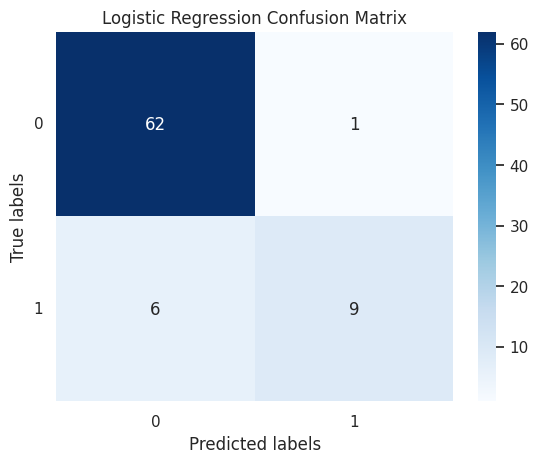

In [ ]:
cm_log =  confusion_matrix(y_test, log_pred)

ax = plt.subplot()
sns.heatmap(cm_log, annot=True, ax = ax, fmt='g', cmap='Blues')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target, rotation=360);

In [ ]:
print(classification_report(y_test, log_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.90      0.60      0.72        15

    accuracy                           0.91        78
   macro avg       0.91      0.79      0.83        78
weighted avg       0.91      0.91      0.90        78



# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_estimator = RandomForestClassifier(random_state=0)
rf_estimator.fit(x_train, y_train)
rf_pred = rf_estimator.predict(x_test)

In [ ]:
print(classification_report(y_test, log_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.90      0.60      0.72        15

    accuracy                           0.91        78
   macro avg       0.91      0.79      0.83        78
weighted avg       0.91      0.91      0.90        78



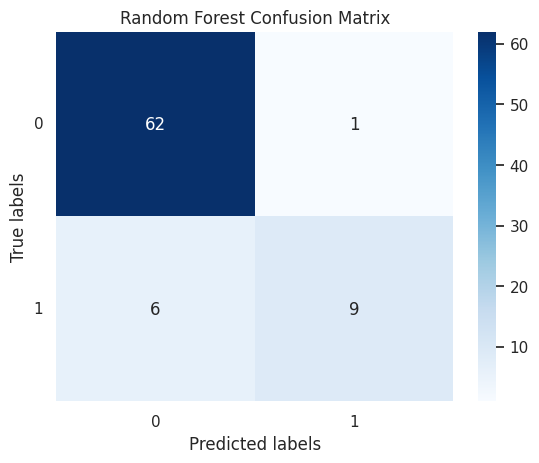

In [ ]:
cm_rf =  confusion_matrix(y_test, rf_pred)

ax = plt.subplot()
sns.heatmap(cm_rf, annot=True, ax = ax, fmt='g', cmap='Blues')

# Labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(target)
ax.yaxis.set_ticklabels(target, rotation=360);

In [ ]:
print(classification_report(y_test, rf_pred, target_names = target))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        63
           1       0.90      0.60      0.72        15

    accuracy                           0.91        78
   macro avg       0.91      0.79      0.83        78
weighted avg       0.91      0.91      0.90        78



# KNN

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
kNN1 = KNeighborsClassifier(n_neighbors=2)
kNN1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
kNN2 = KNeighborsClassifier(n_neighbors=4)
kNN2.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
y_pred=kNN.predict(x_test)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
y_pred1=kNN1.predict(x_test)
y_pred2=kNN2.predict(x_test)

In [ ]:
from sklearn import metrics
print("kNN model accuracy when n =3 :", metrics.accuracy_score(y_test, y_pred))
print("kNN model accuracy when n =2 :", metrics.accuracy_score(y_test, y_pred1))
print("kNN model accuracy when n =4 :", metrics.accuracy_score(y_test, y_pred2))

kNN model accuracy when n =3 : 0.9102564102564102
kNN model accuracy when n =2 : 0.8846153846153846
kNN model accuracy when n =4 : 0.9038461538461539


# Линейная регрессия и R2-детерминация

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

x=np.array(data["glucose"]).reshape((-1, 1))
y=np.array(data["diabetes"])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

linear_regression = LinearRegression()
linear_regression.fit(xtrain, ytrain)
predictions = linear_regression.predict(xtest)

# Calculation of R2 Score
r_sq = linear_regression.score(x, y)
print(r_sq)

0.47355145812411115
